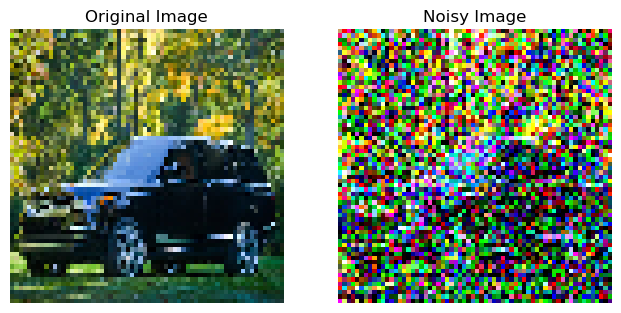

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1039
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0980
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0731
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0574
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0522
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0402
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0394
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0386
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0353
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0328
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0322
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0313
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0296
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0283
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0273
Epoch 16/100
1/1 ━━━━

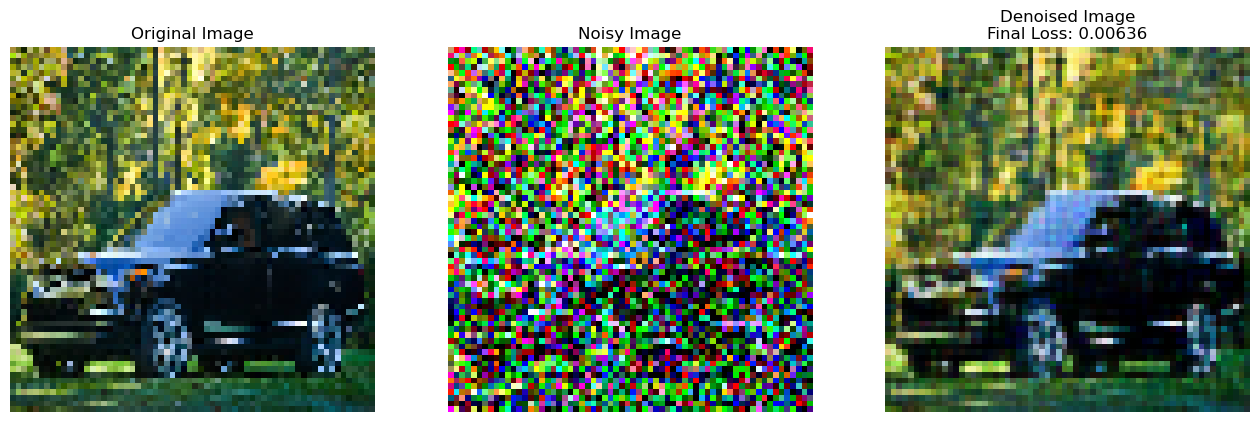

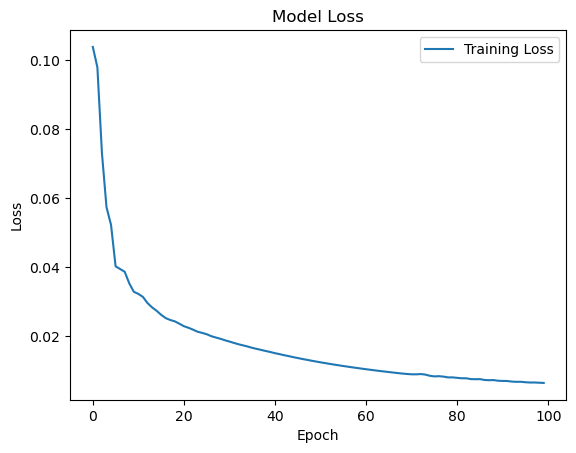

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define the path for the uploaded image in the 'downloads' folder
img_path = 'C:/Users/Admin/Downloads/aga02.jpg'  # Update this path based on where the image is stored
img = image.load_img(img_path, target_size=(64, 64))  # Resize image to 64x64
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img / 255.0  # Normalize image to [0, 1]

# Add random noise to the image
def add_noise(img, noise_factor=0.5):
    noisy_img = img + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=img.shape)
    noisy_img = np.clip(noisy_img, 0., 1.)  # Ensure pixel values are between 0 and 1
    return noisy_img

noisy_img = add_noise(img)

# Plot the original and noisy images
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img[0])
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_img[0])
plt.axis('off')

plt.show()

# Build Denoising Autoencoder
class DenoisingAutoencoder(tf.keras.Model):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        
        # Encoder (Convolutional layers to capture spatial features)
        self.encoder = models.Sequential([
            layers.InputLayer(input_shape=(64, 64, 3)),
            layers.Conv2D(32, 3, activation='relu', padding='same'),
            layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
            layers.Conv2D(64, 3, activation='relu', padding='same'),
            layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
            layers.Flatten(),
            layers.Dense(128, activation='relu')
        ])
        
        # Decoder (Deconvolutional layers to reconstruct image)
        self.decoder = models.Sequential([
            layers.InputLayer(input_shape=(128,)),
            layers.Dense(16 * 16 * 64, activation='relu'),
            layers.Reshape((16, 16, 64)),
            layers.Conv2DTranspose(64, 3, activation='relu', padding='same'),
            layers.UpSampling2D(size=(2, 2)),
            layers.Conv2DTranspose(32, 3, activation='relu', padding='same'),
            layers.UpSampling2D(size=(2, 2)),
            layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')
        ])
        
    def call(self, inputs):
        x = self.encoder(inputs)
        x = self.decoder(x)
        return x

# Instantiate the model
autoencoder = DenoisingAutoencoder()

# Compile the model with Adam optimizer and Mean Squared Error loss
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model without validation split
history = autoencoder.fit(noisy_img, img, epochs=100, batch_size=1)

# Denoise the noisy image
denoised_img = autoencoder(noisy_img)

# Plot the results: original, noisy, and denoised
plt.figure(figsize=(16, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img[0])
plt.axis('off')

# Noisy Image
plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_img[0])
plt.axis('off')

# Denoised Image with final loss displayed
plt.subplot(1, 3, 3)
plt.title(f"Denoised Image\nFinal Loss: {history.history['loss'][-1]:.5f}")
plt.imshow(denoised_img[0])
plt.axis('off')

plt.show()

# Plot the loss during training to observe improvements
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
